# Assignment 1 - Decision Trees and Clustering Techniques

## _Aprendizagem Computacional - MEI | Computação Neuronal e Sistemas Difusos - MIEB_

### by Catarina Silva and Marco Simões

---

This assignment will assess the students knowledge on the following Machine Learning topics:

- Decision Trees
- Clustering Techniques

The assignment is split into two sub-assignments: 
  - 1.a) Decision Trees (first week) 
  - 1.b) Clustering Techniques (second week).

Students should implement their solutions and answering the questions directly in the notebooks, and submit both files together in Inforestudante before the deadline: _06/10/2021_

## Conditions

---

- _Groups:_ two elements of the same PL class
- _Duration:_ 2 weeks
- _Workload:_ 8h per student

## Table of contents

---

- [Assignment 1 - Decision Trees and Clustering Techniques](#assignment-1---decision-trees-and-clustering-techniques)
  - [Conditions](#conditions) 
  - [Table of contents](#table-of-contents)
  - [Project setup](#project-setup)
  - [Group Identification](#group-identification)
  - [Exercises](#exercises)
    - [Ex.1 - Attribute probabilities](#ex-1)
    - [Ex.2 - Entropy](#ex-2)
    - [Ex.3 - Gain](#ex-3)
    - [Ex.4 - Gain results and conclusions](#ex-4)
    - [Ex.5 - Model training and decision tree construction](#ex-5)
    - [Ex.6 - Using the decision tree for classification](#ex-6)
    - [Ex.7 - Gathering decision tree metrics](#ex-7)
    - [Ex.8 - Analysing the decision tree performance](#ex-8)

## Group Identification 
| Student                                    | Number       |
|------------------------------------------- |------------- |
|[Miguel Rabuge](rabuge@student.dei.uc.pt)   | 2018293728   |
|[Pedro Rodrigues](pedror@student.dei.uc.pt) | 2018283166	  |

## Project setup 

---


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data
DATASET_PATH = "depression.csv"
data = pd.read_csv(DATASET_PATH)

## Exercises

---


### Ex. 1

Create a function `attr_probs(data, attr)` that, given the dataset (`data`)
and a attribute id (`attr`), computes the percentage of cases with Abnormal
treatment outcome (D) for each attribute _value_. The function should return a
dictionary with the different attribute values as keys and the correspondent
percentages as values.  

Example: `attr_probs(data, 'A')` -> `{0: 0.67  ,1: 0.41}`

In [36]:
# Dataset column that contains the outcome attribute.
OUTCOME = "D"


def attr_prob(data: pd.DataFrame, attr: str, type: int = 1) -> dict[int, float]:
    """
    Calculate the probability of getting positive / negative (default: positive)
    outcomes for each of the values of in a give attribute.

    Args:
        data (pd.DataFrame): Numpy DataFrame containing the classified dataset.
        attr (str): The attribute dataset column name.
        type (int): Type of the outcome probabilities obtained (positive = 1, negative = 0)

    Returns:
        dict[int, float]: A dictionary with the attribute values
        as keys and the corresponding positive/negative outcome
        probabilities as values.
    """
    prob = {}
    for value in set(data[attr]):
        df = data[data[attr] == value][OUTCOME]
        prob.update({value: float((df.value_counts() / len(df))[type])})
    return prob


if __name__ == "__main__":
    ap = {k: round(v, 2) for k, v in attr_prob(data, "A").items()}
    assert ap == {0: 0.67, 1: 0.41}, "Test Failed!"
    print(ap)


{0: 0.67, 1: 0.41}



---

### Ex. 2

Create a function `entropy(probs)` that, given a list probability values, returns the correspondent **entropy** value.


In [14]:
def entropy(prob: list[float]) -> float:
    """
    Calculate the entropy of a given list of 
    event probability values.

    Args:
        prob (list[float]): A list of probabilities.

    Returns:
        float: The entropy value.
    """

    return -sum([p * np.log2(p) for p in prob if p != 0])

if __name__ == "__main__":
    prob = [2 / 8, 0 / 8, 4 / 8, 2 / 8]
    assert (h := entropy(prob)) == 1.5, "Test Failed!"
    print(h)

1.5



---

### Ex. 3

Create a function `gain(data, attr)` to compute the gain of an attribute. Make use of the functions developed in the previous exercises.


In [15]:
def gain(data: pd.DataFrame, attr: str) -> float:
    """
    Calculate the information gain of a given attribute

    Args:
        data (pd.DataFrame): Numpy DataFrame containing the classified dataset.
        attr (str): [description] The attribute dataset column name.

    Returns:
        float: The information gain value
    """

    attr_info = 0
    prob = attr_prob(data, attr)

    outcome_info = entropy(data[OUTCOME].value_counts() / len(data[OUTCOME]))

    for value, count in data[attr].value_counts().items():
        value_info = entropy([prob[value], 1 - prob[value]])
        attr_info += (count / len(data)) * value_info

    return outcome_info - attr_info


if __name__ == "__main__":
    # Test data (From the book: "Aprendizagem Computacional em Engenharia", pg 86,87)

    test = pd.DataFrame()
    test.insert(0, "T", [0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2])  # "Tempo" column
    test.insert(1, "D", [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])  # "Classe" column

    assert (g := round(gain(test, "T"), 3)) == 0.247, "Test Failed!"
    print(g)


0.247



---

### Ex. 4

Run the following code to compute the gain for the different attributes. In what does those results influence the design of the decision tree?


In [16]:
head = list(data.columns)
attributes, outcome = head[:-1], head[-1]
for attribute in attributes:
    print(f"Gain {attribute}: {gain(data, attribute):.2f}")

Gain A: 0.05
Gain B: 0.02
Gain C: 0.07


**Answer:**

The inforation gain constitutes a measure of the weight that a given attribute has in the decision making 
process, in other words, the attribute that will yield more information to the decision maker. Logically, 
the choice of which attribute will impact not only the design, but also the performance of the decision 
tree in the instance classification. 
In order to build an optimal decision tree, in each tree level, the choice of the attributes must be made in such a way as to choose 
the attribute that contributes with the most information gain (quinlan choice), until there is no attribute left. Hence, given
the information gains obtained for each of the attributes of the "depression.csv dataset, the obvious (for the root of the decision tree) is the
attribute labeled as "C", since its the most discriminant attribute.



---

### Ex. 5

Split the dataset into two sets (train set and test set), assigning randomly $70\%$ of the cases to the train set and the remaining $30\%$ to the test set. Use the `train_test_split` method from the `sklearn.model_selection` module, specifying the `random_state` with a value of $7$ for reproducibility purposes.

Train a `DecisionTreeClassifier` (from the `sklearn.tree` module) using the training data. Enforce the use of the `entropy` criterion instead of the `gini` criterion.

Resort to the function `export_text` from the `sklearn.tree` module to visualize the structure of the resulting tree. Are the results of **Ex. 4** congruent with the tree obtained here? Justify.


In [17]:
training_set, test_set = train_test_split(data, test_size=0.3, random_state=7)
x_train, y_train = training_set[attributes], training_set[outcome]

decision_tree = DecisionTreeClassifier(criterion="entropy").fit(x_train, y_train)
print(export_text(decision_tree, feature_names=attributes,spacing=5))

|----- C <= 1.50
|     |----- A <= 0.50
|     |     |----- B <= 0.50
|     |     |     |----- C <= 0.50
|     |     |     |     |----- class: 1
|     |     |     |----- C >  0.50
|     |     |     |     |----- class: 1
|     |     |----- B >  0.50
|     |     |     |----- C <= 0.50
|     |     |     |     |----- class: 1
|     |     |     |----- C >  0.50
|     |     |     |     |----- class: 1
|     |----- A >  0.50
|     |     |----- C <= 0.50
|     |     |     |----- B <= 0.50
|     |     |     |     |----- class: 0
|     |     |     |----- B >  0.50
|     |     |     |     |----- class: 0
|     |     |----- C >  0.50
|     |     |     |----- B <= 0.50
|     |     |     |     |----- class: 0
|     |     |     |----- B >  0.50
|     |     |     |     |----- class: 1
|----- C >  1.50
|     |----- B <= 0.50
|     |     |----- A <= 0.50
|     |     |     |----- class: 1
|     |     |----- A >  0.50
|     |     |     |----- class: 0
|     |----- B >  0.50
|     |     |----- A <= 0.50
|  

**Answer:**

Taking a closer look at the decision tree that was produced using training the ID3 algorithm with a training subset obtained from the initial dataset provided, we can observe that the attribute/feature that
was placed in the root node of the tree (on the first iteration) was indeed the one labeled "C". 
This result is consistent with our initial expectations (Ex.4) since the attribute "C" was the one that yielded the best information gain, therefore being the most discriminant attribute. 

---

### Ex 6

Looking for the structure of the tree printed, evaluate the following cases (by hand) and provide the outcome class for each case, as well as the path from the root to the leaf (meaning, provide the conditions it evaluated as true to reach that class).

**Cases:**<p>
c1 = (A=1, B=0, C=2)<p>
c2 = (A=0, B=0, C=0)<p>
c3 = (A=0, B=0, C=1)<p>
c4 = (A=1, B=1, C=0)<p>

**Example:**<p>
case: cx = (A=1, B=1, C=1)<p>
path: (C <= 1.5) --> (A > 0.5) --> (C > 0.5) --> (B > 0.5) --> class 1<p>


**Answer:**

case: c1 = (A=1, B=0, C=2)  

path: `(C > 1.5) --> (B <= 0.5) --> (A > 0.5) --> class 0` 

\_

case: c2 = (A=0, B=0, C=0) 

path: `(C <= 1.5) --> (A < 0.5) --> (B <= 0.5) --> (C <= 0.5) --> class 1` 

\_

case: c3 = (A=0, B=0, C=1) 

path: `(C <= 1.5) --> (A <= 0.5) --> (B <= 0.5) --> (C > 0.5) --> class 1` 

\_

case: c4 = (A=1, B=1, C=0) 

path: `(C <= 1.5) --> (A > 0.5) --> (C <= 0.5) --> (B > 0.5) --> class 0`


---

### Ex. 7

Apply the decision tree trained in the previous exercise to the test data. Compare the predicted labels to the true labels, generating a confusion matrix (you can use the `confusion_matrix` function of the `sklearn.metrics` module for that). Report the **percentage** of `True Positives, True Negatives, False Positives and False Negatives`, as well as the metrics `accuracy, precision, recall and f1-score`.


In [18]:
x_test, y_test = test_set[attributes], test_set[outcome]
prediction = decision_tree.predict(x_test)
matrix = confusion_matrix(prediction, y_test)

print(f"Accuracy Score: {accuracy_score(y_test, prediction):.3f}")
print(f"Precision_score: {precision_score(y_test, prediction):.3f}")
print(f"Recall_score: {recall_score(y_test, prediction):.3f}")
print(f"F1-score: {f1_score(y_test, prediction):.3f}")
print(f"Confusion Matrix (%): \n{matrix / matrix.sum()}")

Accuracy Score: 0.686
Precision_score: 0.661
Recall_score: 0.757
F1-score: 0.706
Confusion Matrix (%): 
[[0.31045752 0.12091503]
 [0.19281046 0.37581699]]


---

### Ex. 8

Repeat the process of spliting the data, training the classifier and testing the classifier 100 times (use the values from 0 to 99 as `random_state` for the `train_test_split`function). Plot the accuracy across the 100 repetitions, reporting also its mean value and standard deviation.


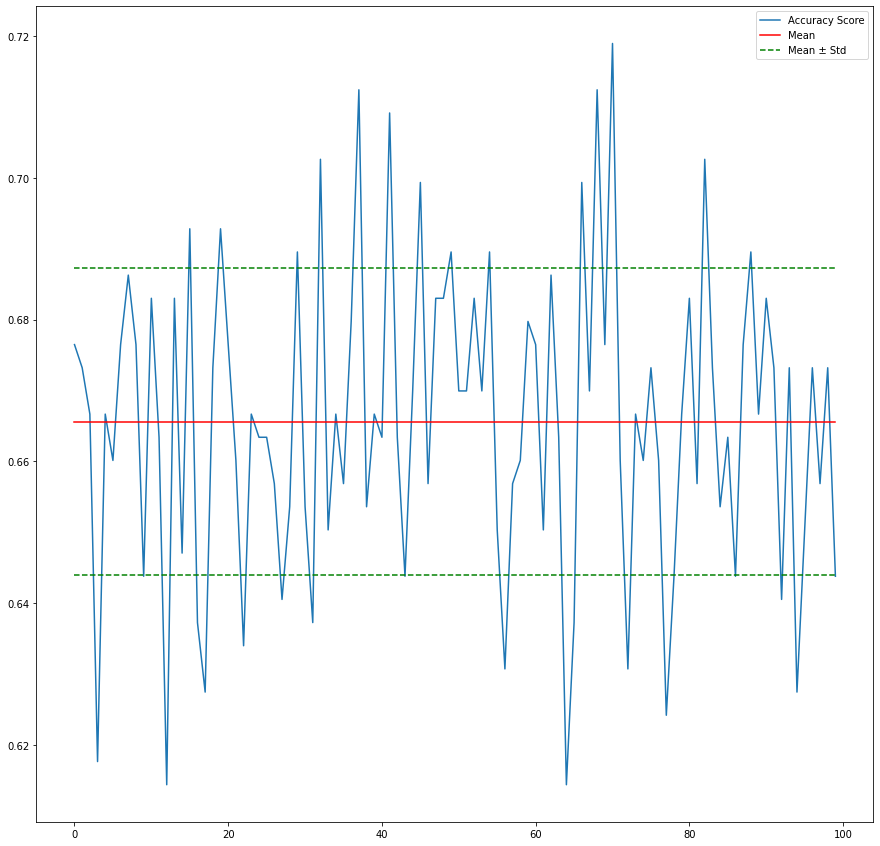

In [37]:
def run_loop(runs: int = 100) -> list[float]:
    """
    Run the decision tree algorithm (ID3) and
    train the model with data and register accuracy score 
    over a set of runs.

    Args:
        runs (int, optional): Number of runs .Defaults to 100.

    Returns:
        list[float]: A python list containing the accuracy score 
        obtained from each of the runs.
    """

    run_data = []
    for state in range(runs):
        training_set, test_set = train_test_split(
            data, test_size=0.3, random_state=state)
        x_train, y_train = training_set[attributes], training_set[outcome]
        x_test, y_test = test_set[attributes], test_set[outcome]

        decision_tree.fit(x_train, y_train)
        run_data.append(accuracy_score(y_test, decision_tree.predict(x_test)))
    return run_data


def plot(run_data: list[float]) -> None:
    """
    Plot accuracy score obtained from all the runs
    and also some statics about that data (mean, std)

    Args:
        run_data (list[float]): A python list containing the 
        accuracy score obtained from each of the runs.
    """

    avg, std = np.mean(run_data), np.std(run_data)
    plt.figure(figsize=(15, 15))
    plt.plot(range(100), run_data, label="Accuracy Score")
    plt.plot(range(100), [avg] * 100, color="red", label="Mean")
    plt.plot(range(100), [avg + std] * 100, color='green',
             linestyle='dashed', label="Mean ± Std")
    plt.plot(range(100), [avg - std] * 100, color='green', linestyle='dashed')
    plt.legend()


if __name__ == "__main__":
    plot(run_loop())
